In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
df = pd.read_csv('Data/BTC_Daily_Six_Years.csv')

In [3]:
df

,close,high,low,open,timestamp,volume
0,4326.09,4349.00,4154.28,4162.04,1506729600,7496.782499
1,4377.22,4377.22,4216.00,4326.09,1506816000,7211.335136
2,4391.48,4453.00,4352.00,4369.33,1506902400,8259.818632
3,4315.83,4425.00,4218.00,4391.41,1506988800,12468.057256
4,4219.53,4343.00,4170.07,4315.73,1507075200,8518.992749
...,...,...,...,...,...,...
2233,37152.00,37422.00,36673.00,37350.00,1699660800,808.306734
2234,37086.00,37237.00,36758.00,37136.00,1699747200,549.562415
2235,36485.00,37421.00,36355.00,37085.00,1699833600,1510.519182
2236,35564.00,36749.00,35002.00,36474.00,1699920000,1717.045210


In [4]:
# Get the date from the timestamp
df['datetime'] = df['timestamp'].apply(lambda x: datetime.datetime.utcfromtimestamp(x))
df

,close,high,low,open,timestamp,volume,datetime
0,4326.09,4349.00,4154.28,4162.04,1506729600,7496.782499,2017-09-30
1,4377.22,4377.22,4216.00,4326.09,1506816000,7211.335136,2017-10-01
2,4391.48,4453.00,4352.00,4369.33,1506902400,8259.818632,2017-10-02
3,4315.83,4425.00,4218.00,4391.41,1506988800,12468.057256,2017-10-03
4,4219.53,4343.00,4170.07,4315.73,1507075200,8518.992749,2017-10-04
...,...,...,...,...,...,...,...
2233,37152.00,37422.00,36673.00,37350.00,1699660800,808.306734,2023-11-11
2234,37086.00,37237.00,36758.00,37136.00,1699747200,549.562415,2023-11-12
2235,36485.00,37421.00,36355.00,37085.00,1699833600,1510.519182,2023-11-13
2236,35564.00,36749.00,35002.00,36474.00,1699920000,1717.045210,2023-11-14


In [5]:
# Make the index the date
#df.set_index('datetime', inplace=True)
#df

In [6]:
df['realized_vol'] = (df['close'] - df['close'].shift(1)) / df['close'].shift(1) * 100

In [7]:
df['realized_absolute_vol'] = abs(df['realized_vol'])
df

,close,high,low,open,timestamp,volume,datetime,realized_vol,realized_absolute_vol
0,4326.09,4349.00,4154.28,4162.04,1506729600,7496.782499,2017-09-30,NaN,NaN
1,4377.22,4377.22,4216.00,4326.09,1506816000,7211.335136,2017-10-01,1.181899,1.181899
2,4391.48,4453.00,4352.00,4369.33,1506902400,8259.818632,2017-10-02,0.325778,0.325778
3,4315.83,4425.00,4218.00,4391.41,1506988800,12468.057256,2017-10-03,-1.722654,1.722654
4,4219.53,4343.00,4170.07,4315.73,1507075200,8518.992749,2017-10-04,-2.231321,2.231321
...,...,...,...,...,...,...,...,...,...
2233,37152.00,37422.00,36673.00,37350.00,1699660800,808.306734,2023-11-11,-0.447493,0.447493
2234,37086.00,37237.00,36758.00,37136.00,1699747200,549.562415,2023-11-12,-0.177649,0.177649
2235,36485.00,37421.00,36355.00,37085.00,1699833600,1510.519182,2023-11-13,-1.620558,1.620558
2236,35564.00,36749.00,35002.00,36474.00,1699920000,1717.045210,2023-11-14,-2.524325,2.524325


In [8]:
df1 = df.loc[:, [ 'close','realized_absolute_vol','datetime']]
df1

,close,realized_absolute_vol,datetime
0,4326.09,NaN,2017-09-30
1,4377.22,1.181899,2017-10-01
2,4391.48,0.325778,2017-10-02
3,4315.83,1.722654,2017-10-03
4,4219.53,2.231321,2017-10-04
...,...,...,...
2233,37152.00,0.447493,2023-11-11
2234,37086.00,0.177649,2023-11-12
2235,36485.00,1.620558,2023-11-13
2236,35564.00,2.524325,2023-11-14


In [9]:
#df1.set_index('datetime', inplace=True)
df1

,close,realized_absolute_vol,datetime
0,4326.09,NaN,2017-09-30
1,4377.22,1.181899,2017-10-01
2,4391.48,0.325778,2017-10-02
3,4315.83,1.722654,2017-10-03
4,4219.53,2.231321,2017-10-04
...,...,...,...
2233,37152.00,0.447493,2023-11-11
2234,37086.00,0.177649,2023-11-12
2235,36485.00,1.620558,2023-11-13
2236,35564.00,2.524325,2023-11-14


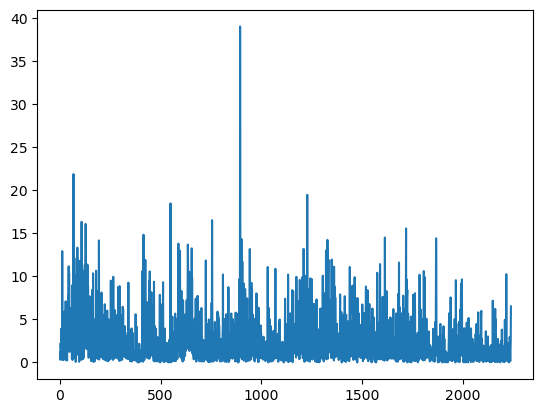

In [10]:
plt.plot(df1['realized_absolute_vol'])

In [11]:
df_realized = df1.drop([0])
df_realized

,close,realized_absolute_vol,datetime
1,4377.22,1.181899,2017-10-01
2,4391.48,0.325778,2017-10-02
3,4315.83,1.722654,2017-10-03
4,4219.53,2.231321,2017-10-04
5,4301.09,1.932917,2017-10-05
...,...,...,...
2233,37152.00,0.447493,2023-11-11
2234,37086.00,0.177649,2023-11-12
2235,36485.00,1.620558,2023-11-13
2236,35564.00,2.524325,2023-11-14


In [12]:
# We create a CSV which just contains the close data and the realized absolute vol data
df_realized.to_csv("Data/BTC_Daily_Six_Years_Simplified.csv", index=False)

In [13]:
df_hourly = pd.read_csv('Data/BTC_Hourly_Six_Years.csv')

In [14]:
# Get the date from the timestamp
df_hourly['datetime'] = df_hourly['timestamp'].apply(lambda x: datetime.datetime.utcfromtimestamp(x))
df_hourly

,close,high,low,open,timestamp,volume,datetime
0,4176.08,4177.63,4154.28,4162.04,1506729600,114.805325,2017-09-30 00:00:00
1,4208.14,4224.60,4170.84,4170.84,1506733200,348.452795,2017-09-30 01:00:00
2,4203.33,4217.56,4194.04,4207.58,1506736800,143.563557,2017-09-30 02:00:00
3,4190.72,4206.94,4185.67,4206.89,1506740400,153.187721,2017-09-30 03:00:00
4,4193.47,4206.59,4180.55,4185.73,1506744000,123.810199,2017-09-30 04:00:00
...,...,...,...,...,...,...,...
52579,26918.00,26955.00,26892.00,26930.00,1696014000,57.433587,2023-09-29 19:00:00
52580,26907.00,26973.00,26871.00,26920.00,1696017600,139.259314,2023-09-29 20:00:00
52581,26875.00,26919.00,26871.00,26910.00,1696021200,32.825604,2023-09-29 21:00:00
52582,26886.00,26915.00,26862.00,26875.00,1696024800,58.682014,2023-09-29 22:00:00


In [15]:
# Make the index the date
df_hourly.set_index('datetime', inplace=True)

In [16]:
df_hourly['realized_vol'] = (df_hourly['close'] - df_hourly['close'].shift(1)) / df_hourly['close'].shift(1) * 100

In [17]:
df_hourly['realized_absolute_vol'] = abs(df_hourly['realized_vol'])
df_hourly

,close,high,low,open,timestamp,volume,realized_vol,realized_absolute_vol
datetime,,,,,,,,
2017-09-30 00:00:00,4176.08,4177.63,4154.28,4162.04,1506729600,114.805325,NaN,NaN
2017-09-30 01:00:00,4208.14,4224.60,4170.84,4170.84,1506733200,348.452795,0.767706,0.767706
2017-09-30 02:00:00,4203.33,4217.56,4194.04,4207.58,1506736800,143.563557,-0.114302,0.114302
2017-09-30 03:00:00,4190.72,4206.94,4185.67,4206.89,1506740400,153.187721,-0.300000,0.300000
2017-09-30 04:00:00,4193.47,4206.59,4180.55,4185.73,1506744000,123.810199,0.065621,0.065621
...,...,...,...,...,...,...,...,...
2023-09-29 19:00:00,26918.00,26955.00,26892.00,26930.00,1696014000,57.433587,-0.007429,0.007429
2023-09-29 20:00:00,26907.00,26973.00,26871.00,26920.00,1696017600,139.259314,-0.040865,0.040865
2023-09-29 21:00:00,26875.00,26919.00,26871.00,26910.00,1696021200,32.825604,-0.118928,0.118928


In [18]:
df_hourly1 = df_hourly.loc[:, [ 'close','realized_absolute_vol']]
df_hourly1

,close,realized_absolute_vol
datetime,,
2017-09-30 00:00:00,4176.08,NaN
2017-09-30 01:00:00,4208.14,0.767706
2017-09-30 02:00:00,4203.33,0.114302
2017-09-30 03:00:00,4190.72,0.300000
2017-09-30 04:00:00,4193.47,0.065621
...,...,...
2023-09-29 19:00:00,26918.00,0.007429
2023-09-29 20:00:00,26907.00,0.040865
2023-09-29 21:00:00,26875.00,0.118928


In [19]:
df_realized_hourly = df_hourly1.drop(pd.to_datetime('2017-09-30 00:00:00'))
df_realized_hourly

,close,realized_absolute_vol
datetime,,
2017-09-30 01:00:00,4208.14,0.767706
2017-09-30 02:00:00,4203.33,0.114302
2017-09-30 03:00:00,4190.72,0.300000
2017-09-30 04:00:00,4193.47,0.065621
2017-09-30 05:00:00,4224.95,0.750691
...,...,...
2023-09-29 19:00:00,26918.00,0.007429
2023-09-29 20:00:00,26907.00,0.040865
2023-09-29 21:00:00,26875.00,0.118928


In [20]:
# Create a CSV which just contains the close data and the realized absolute vol data
df_realized.to_csv("BTC_Hourly_Six_Years_simplified.csv", index=False)